In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC


In [3]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

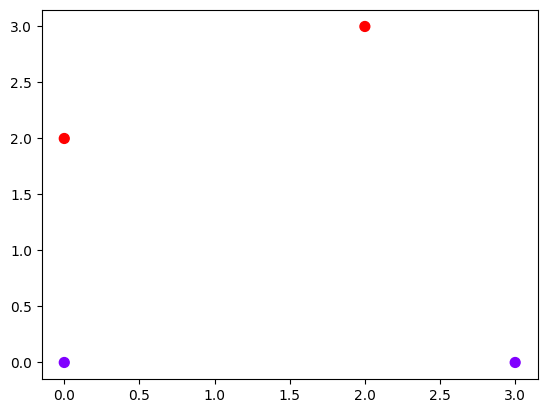

In [4]:
data = [[0,0,-1], [3,0,-1], [0,2,1], [2,3,1]]
df = pd.DataFrame(data, columns=['x', 'y', 'label'])
plt.scatter(df['x'], df['y'], c=df['label'], s=50, cmap='rainbow')

c:\Users\David\Desktop\HSLU\sem4\adml\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


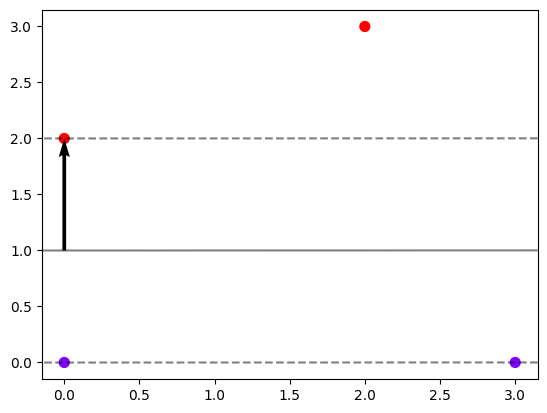

In [7]:
clf = SVC(kernel='linear').fit(df[['x', 'y']], df['label'])
plt.scatter(df['x'], df['y'], c=df['label'], s=50, cmap='rainbow')
plt.quiver([0], [1], [0], [1], angles='xy', scale_units='xy', scale=1)
plot_svc_decision_function(clf);

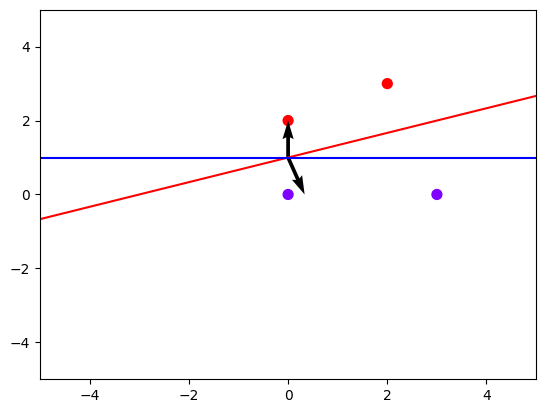

In [14]:
x = np.linspace(-5,5,100)
plt.scatter(df['x'], df['y'], c=df['label'], s=50, cmap='rainbow')
plt.plot(x, 1/3 * x + 1, '-r', label='y = 1/3 * x + 1')
plt.plot(x, 0*x + 1, '-b', label='y = 1')
plt.quiver([0,0], [1,1], [0,1/3], [1,-1], angles='xy', scale_units='xy', scale=1)
plt.axis((-5,5,-5,5))
plt.show()